In [4]:
!pip install sqlalchemy
!pip install pymysql



     |████████████████████████████████| 47 kB 1.6 MB/s eta 0:00:01


In [15]:
import pandas as pd 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [6]:
conn = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
                       .format(user="root",
                               pw="123",
                               host="db",
                               db="invest"))


In [7]:
perfilCliente = pd.read_csv('Dataset-1.csv')
pageViews = pd.read_csv('Dataset-2.csv', )
catProdutos = pd.read_csv('Dataset-3.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
catProdutos.to_sql(name='Produtos', con=conn, if_exists = 'replace', index=False)
perfilCliente.to_sql(name='Clientes', con=conn, if_exists = 'replace', index=False)
pageViews.to_sql(name='PageViews', con=conn, if_exists = 'replace', index=False)


In [10]:
pageViews.head()

,dataId,customerId,pagePath,pageView
0,0,NaN,/s/,3
1,1,NaN,/s/,8
2,2,NaN,/s/produtosprincipal,1
3,3,NaN,/s/,21
4,4,NaN,/s/,6


In [11]:
perfilCliente.head()

,dataId,ClienteId,Idade,EstadoCivil,BillingCity,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,...,ValorMinimoAplicacaoAdicional,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo,Status,ProdutoId
0,0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,30,M,Aracruz,1.0,1.0,2,1300.0,6000.0,...,30.0,NaN,Renda Fixa,30.0,NaN,0.0,0.37005375,1.0,Efetivada,a0W6A000009GZdgUAG
1,1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,150.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
2,2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,50.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
3,3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,60.0,NaN,0.0,0.13178136,1.0,Efetivada,a0W6A000009GZdgUAG
4,4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,40.0,NaN,0.0,0.15076414,1.0,Efetivada,a0W6A000009GZdgUAG


In [13]:
catProdutos.head()

,dataId,AdministradorFundo,AtivoDisponivel,Carencia,CarteiraCNPJ,CNPJAdministrador,DataDeVencimento,DescontoIR,DescricaoAtivo,DescricaoCarencia,...,TipoCarteira,TipoCota,TipoIndexador,TipoRegimeCondomonioCVM,Tributacao,ValorMinimoAplicacaoAdicional,ValorMinimoAplicaInicial,ValorMinimoResgate,ValorMinimo,Vencimento
0,0,NaN,False,2020-11-16,NaN,NaN,2020-11-16,20.0,"O Certificado de Depxsito Bancxrio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2020-11-16
1,1,NaN,False,2021-11-16,NaN,NaN,2021-11-16,17.5,"O Certificado de Depxsito Bancxrio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2021-11-16
2,2,NaN,False,2022-11-16,NaN,NaN,2022-11-16,15.0,"O Certificado de Depxsito Bancxrio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2022-11-16
3,3,NaN,False,2024-11-18,NaN,NaN,2024-11-18,15.0,"O Certificado de Depxsito Bancxrio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2024-11-18
4,4,NaN,False,2020-11-03,NaN,NaN,2020-11-03,20.0,"O Certificado de Depxsito Bancxrio, de forma s...",No venc.,...,NaN,NaN,Pré fixado,NaN,NaN,NaN,NaN,NaN,5000.0,2020-11-03


<function matplotlib.pyplot.show(*args, **kw)>

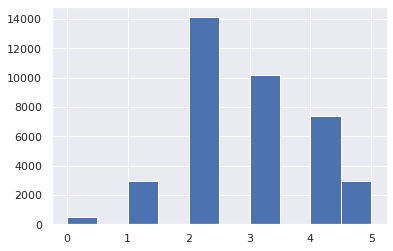

In [16]:
plt.figure()
plt.hist(perfilCliente.PerfilInvestidor)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

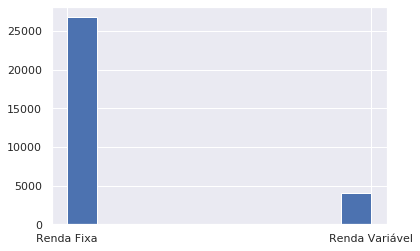

In [18]:
plt.figure()
pc = perfilCliente.FamiliaCarteira
pc.dropna(inplace=True)
plt.hist(pc)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

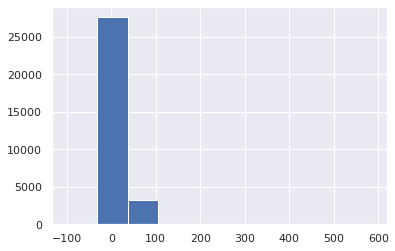

In [20]:
plt.figure()
plt.hist(perfilCliente.Rentabilidade12Meses)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

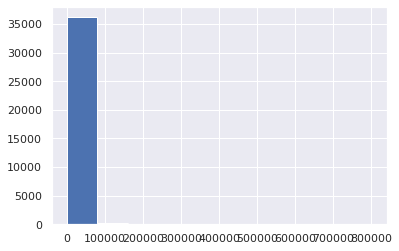

In [21]:
plt.figure()
plt.hist(perfilCliente.ValorInvestidoAtual)
plt.show

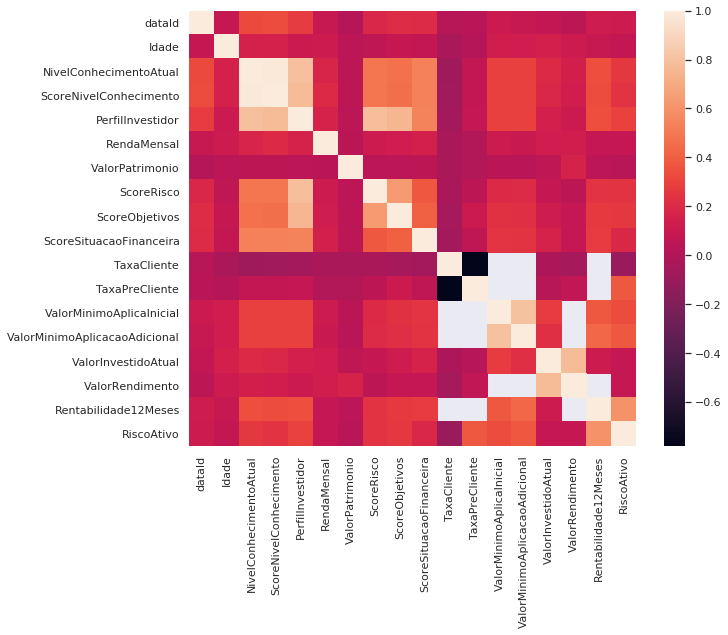

In [23]:
plt.figure(figsize=(10, 8))
corr = perfilCliente.corr()
sns.heatmap(corr)

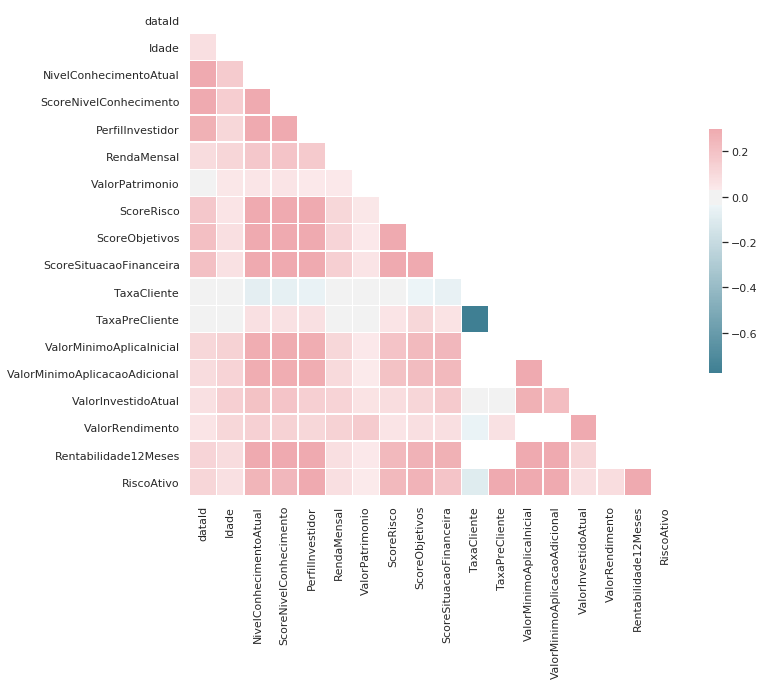

In [24]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)


# Compute the correlation matrix
corr = perfilCliente.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})